In [16]:
# Setup
import numpy as np 
import pandas as pd 
import os
import pickle

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images/model_evaluation_images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(model, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, model, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_model(model, folder_path="models", file_name="untitled_model.sav"):
    pickle.dump(model, open(os.path.join(folder_path, file_name), 'wb'))

In [17]:
HEARTDISEASE_FULL_PATH = "dataset/afterpreprocessing/full"

x_test = pd.read_csv(os.path.join(HEARTDISEASE_FULL_PATH, f'heartDisease_x_test.csv'))
x_test.head()

,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2582,1,1,2,10,88,2,1,8,1,3,2,2,7,2,2,2
1,3396,2,1,2,88,88,2,1,9,5,1,1,3,8,2,2,2
2,2767,2,1,2,88,88,1,1,8,1,3,2,2,7,2,2,2
3,2923,2,1,2,88,20,2,2,5,1,3,2,3,4,2,2,2
4,2823,2,1,2,1,1,2,1,10,1,3,1,5,7,2,2,2


In [18]:
y_test = pd.read_csv(os.path.join(HEARTDISEASE_FULL_PATH, f'heartDisease_y_test.csv'))
y_test.head()

,heartDisease
0,2
1,2
2,2
3,2
4,2


In [19]:
HEARTDISEASE_RED_PATH = "dataset/afterpreprocessing/reduced"

red_x_test = pd.read_csv(os.path.join(HEARTDISEASE_RED_PATH, f'heartDisease_red_x_test.csv'))
red_x_test.head()

,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity
0,2582,1,1,2,10,88,2,1,8,1,3,2
1,3396,2,1,2,88,88,2,1,9,5,1,1
2,2767,2,1,2,88,88,1,1,8,1,3,2
3,2923,2,1,2,88,20,2,2,5,1,3,2
4,2823,2,1,2,1,1,2,1,10,1,3,1


In [20]:
red_y_test = pd.read_csv(os.path.join(HEARTDISEASE_RED_PATH, f'heartDisease_red_y_test.csv'))
red_y_test.head()

,heartDisease
0,2
1,2
2,2
3,2
4,2


In [21]:
# Load models
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")

DECISION_TREE_PATH = os.path.join(MODELS_PATH, 'decision_tree')
KNN_PATH = os.path.join(MODELS_PATH, 'knn')
LOGREG_PATH = os.path.join(MODELS_PATH, 'log_regression')
KMEANS_PATH = os.path.join(MODELS_PATH, 'kmeans')
RANDOMFOREST_PATH = os.path.join(MODELS_PATH, 'randomforest')

full_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "full_decision_tree_model.sav"), 'rb'))
reduced_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "reduced_decision_tree_model.sav"), 'rb'))
reduced_kmeans_model = pickle.load(open(os.path.join(KMEANS_PATH, "reduced_kmeans_model.sav"), 'rb'))
full_knn_model = pickle.load(open(os.path.join(KNN_PATH, "full_knn_model.sav"), 'rb'))
full_logregression_model = pickle.load(open(os.path.join(LOGREG_PATH, "full_logregression_model.sav"), 'rb'))
reduced_randomforest_model = pickle.load(open(os.path.join(RANDOMFOREST_PATH, "reduced_randomforest_model.sav"), 'rb'))

full_models_names = ["Full Decision Tree", "Full KNN", "Full Logistic Regression"]
reduced_models_names = ["Reduced Decision Tree", "Reduced KMeans", "Reduced Random Forest"]
full_models = [full_decisiontree_model, full_knn_model, full_logregression_model]
reduced_models = [reduced_decisiontree_model, reduced_kmeans_model, reduced_randomforest_model]

### Display Decision Tree Metrics

Decision Tree Metrics:

Number of Positive Predictions (Heart Disease): 976
Number of Negative Predictions (No Heart Disease): 104684
              precision    recall  f1-score   support

           1       0.56      0.06      0.11      9335
           2       0.92      1.00      0.95     96325

    accuracy                           0.91    105660
   macro avg       0.74      0.53      0.53    105660
weighted avg       0.88      0.91      0.88    105660

AUC: 0.816
Mean Absolute Error of the decision tree model is 0.08721370433465833
False Positive Rate [0.         0.34861147 0.50190501 0.51531793 0.52550221 0.62385674
 0.63659486 0.71137296 0.7255645  0.79396834 0.85268622 0.85697379
 0.85992214 0.89864521 0.90268362 0.94351414 0.94440696 0.96276148
 0.96509733 0.96578251 0.96947833 0.97402543 0.97431612 0.97532312
 0.98850766 0.99248378 0.99521412 0.99555671 0.99828705 0.99873345
 0.99879574 0.99952245 1.        ] True Postitive Rate [0.         0.03395822 0.08044992 0.08409213 0.0

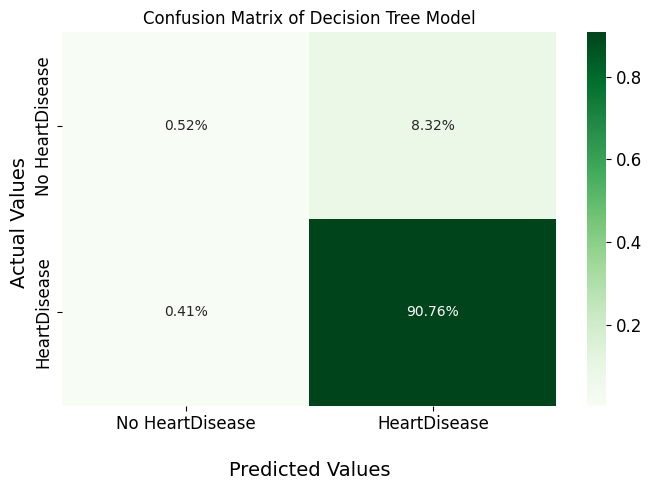

Saving figure ROC_Curve_of_Decision_Tree_Model


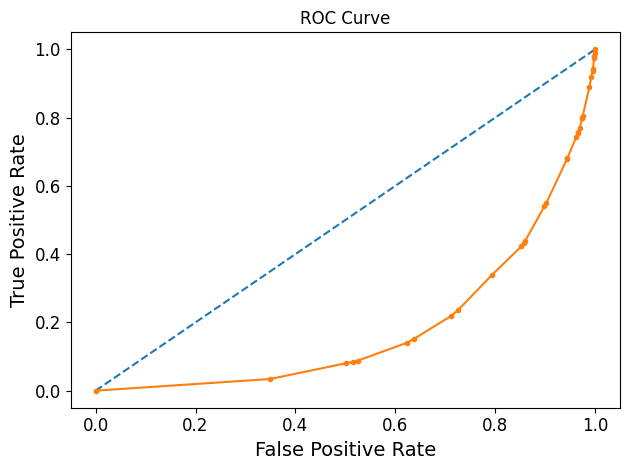

Saving figure Precision_Recall_Curve_of_Decision_Tree_Model


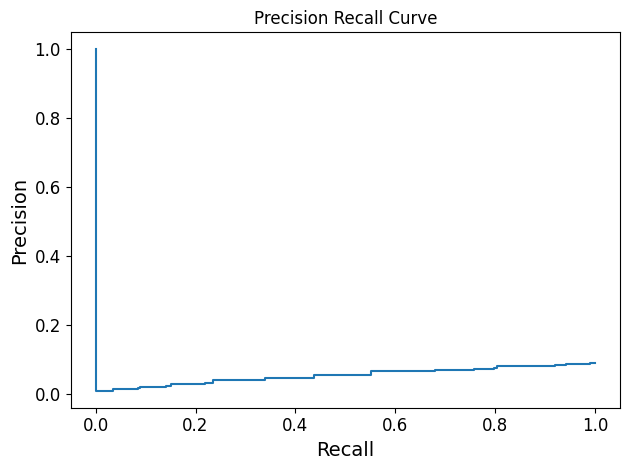

In [22]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, mean_absolute_error, PrecisionRecallDisplay, precision_recall_curve
import seaborn as sns
#Predict the response for test dataset
DECISION_TREE_PATH = os.path.join('decision_tree')
def evaluate_DecisionTree():
    print("Decision Tree Metrics:\n")
    clf = full_decisiontree_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(y_test, y_pred)

    # evaluate 
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the decision tree model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,
                                    pos_label=1)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.set_title('Confusion Matrix of Decision Tree Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(DECISION_TREE_PATH,f"Confusion_Matrix_of_Decision_Tree_Model")
    plt.show()


    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"ROC_Curve_of_Decision_Tree_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"Precision_Recall_Curve_of_Decision_Tree_Model")
    plt.show()
    return fpr, tpr

fpr, tpr = evaluate_DecisionTree()

### Display Logistic Regression Metrics

Logistic Regression Metrics:

Number of Positive Predictions (Heart Disease): 1481
Number of Negative Predictions (No Heart Disease): 104179
              precision    recall  f1-score   support

           1       0.51      0.08      0.14      9335
           2       0.92      0.99      0.95     96325

    accuracy                           0.91    105660
   macro avg       0.71      0.54      0.55    105660
weighted avg       0.88      0.91      0.88    105660

AUC: 0.828
Mean Absolute Error of the logistic regression model is 0.08803710013250048
False Positive Rate [0.00000000e+00 1.03815209e-05 2.28393460e-04 ... 9.99979237e-01
 9.99979237e-01 1.00000000e+00] True Postitive Rate [0.         0.         0.         ... 0.99989288 1.         1.        ]
Saving figure Confusion_Matrix_of_Logistic_Regression_Model


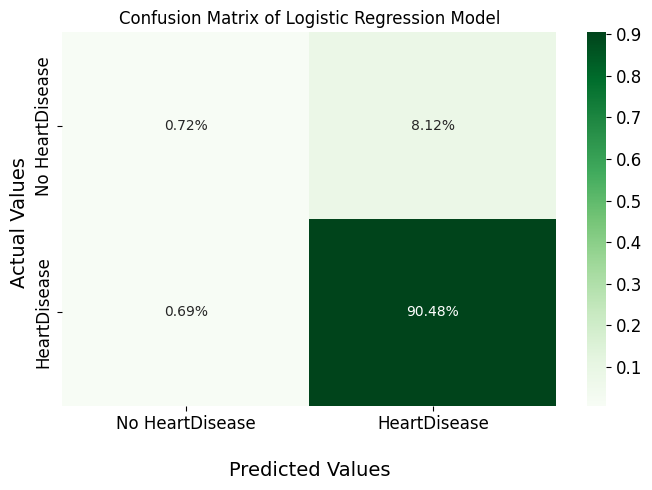

Saving figure ROC_Curve_of_Logistic_Regression_Model


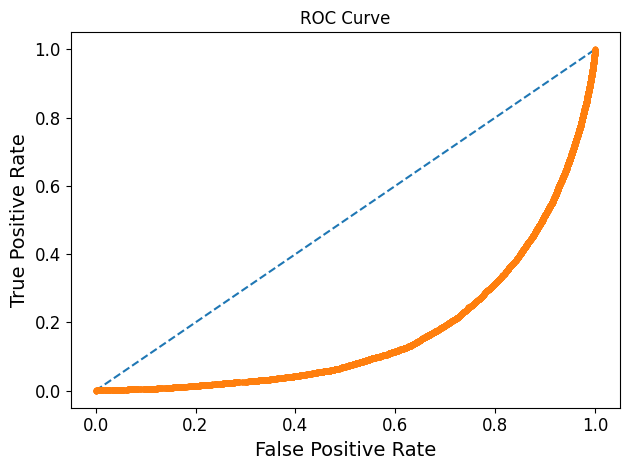

Saving figure Calibration_Curve_of_Logistic_Regression_Model


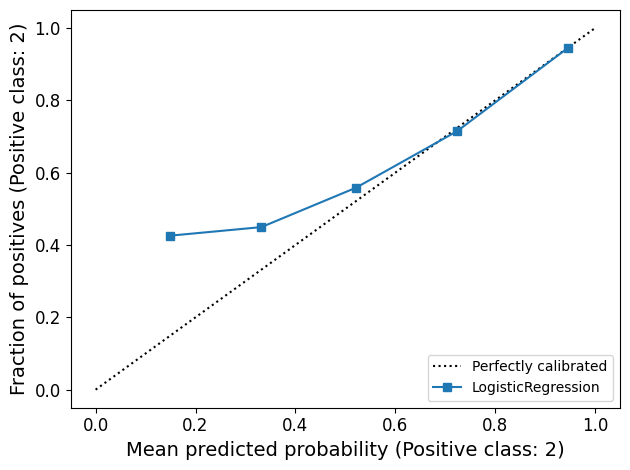

In [23]:
# Evaluate Logistic Regression model 
LOGREG_PATH = os.path.join('log_regression')

def evaluate_LogisticRegression():
    print("Logistic Regression Metrics:\n")
    clf = full_logregression_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(y_test, y_pred)

    # evaluate
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the logistic regression model is", mae)

    # calculate roc curve
    fpr, tpr,thresholds = roc_curve(y_test, probs, pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.set_title('Confusion Matrix of Logistic Regression Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(LOGREG_PATH,f"Confusion_Matrix_of_Logistic_Regression_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(LOGREG_PATH,f"ROC_Curve_of_Logistic_Regression_Model")
    plt.show()
    
    from sklearn.calibration import CalibrationDisplay
    disp = CalibrationDisplay.from_estimator(clf, x_test, y_test)
    save_fig(LOGREG_PATH,f"Calibration_Curve_of_Logistic_Regression_Model")
    plt.show()
    return fpr, tpr

fpr1, tpr1 = evaluate_LogisticRegression()


### Display KNN Metrics
This model takes too long to run

KNN Metrics:

Number of Positive Predictions (Heart Disease): 1928
Number of Negative Predictions (No Heart Disease): 103732
              precision    recall  f1-score   support

           1       0.27      0.06      0.09      9335
           2       0.92      0.99      0.95     96325

    accuracy                           0.90    105660
   macro avg       0.59      0.52      0.52    105660
weighted avg       0.86      0.90      0.87    105660

AUC: 0.652
False Positive Rate [0.         0.73187646 0.92901116 0.98545549 0.99812094 0.9998858
 1.        ] True Postitive Rate [0.         0.44584896 0.79003749 0.9435458  0.99089448 0.99925013
 1.        ]
Saving figure ROC_Curve_of_KNN_Model


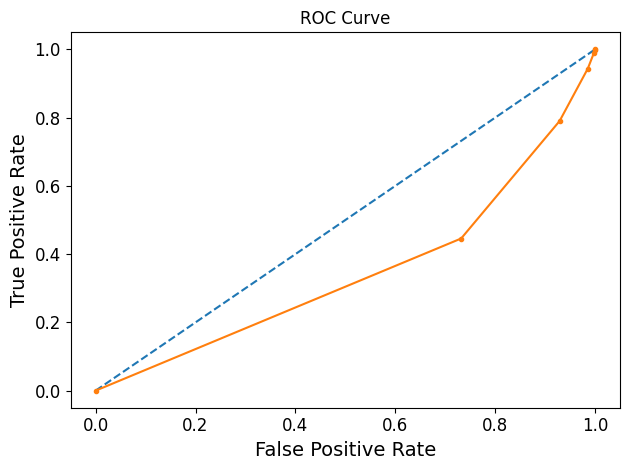

Saving figure Precision_Recall_Curve_of_KNN_Model


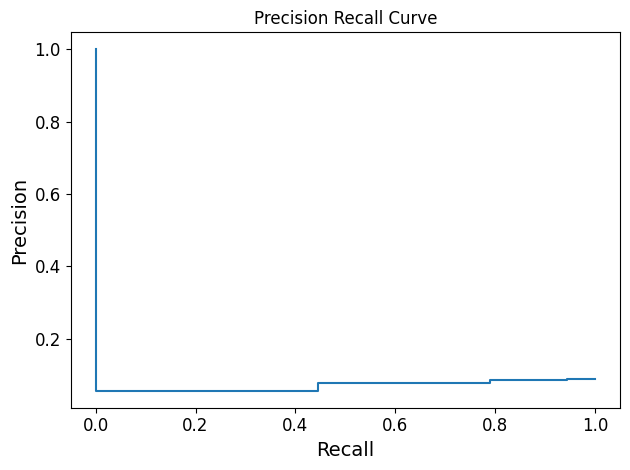

In [24]:
# Display KKN Metrics
KNN_PATH = os.path.join('knn')
def evaluate_KNN():
    print("KNN Metrics:\n")
    knn = full_knn_model
    y_pred = knn.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(y_test, y_pred)
    # evaluate
    print(classification_report(y_test, y_pred))

    # predict probabilities
    probs = knn.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label=1)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(KNN_PATH,f"ROC_Curve_of_KNN_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(KNN_PATH,f"Precision_Recall_Curve_of_KNN_Model")
    plt.show()
    return fpr,tpr

fpr2,tpr2 = evaluate_KNN()

### Display KMeans Metrics


KMeans Metrics:

Number of Positive Predictions (Heart Disease): 1928
Number of Negative Predictions (No Heart Disease): 103732
              precision    recall  f1-score   support

           1       0.27      0.06      0.09      9335
           2       0.92      0.99      0.95     96325

    accuracy                           0.90    105660
   macro avg       0.59      0.52      0.52    105660
weighted avg       0.86      0.90      0.87    105660

AUC: 0.652
Mean Absolute Error of the KNN model is 0.09662123793299261
False Positive Rate [0.         0.73187646 0.92901116 0.98545549 0.99812094 0.9998858
 1.        ] True Postitive Rate [0.         0.44584896 0.79003749 0.9435458  0.99089448 0.99925013
 1.        ]
Saving figure Confusion_Matrix_of_KNN_Model


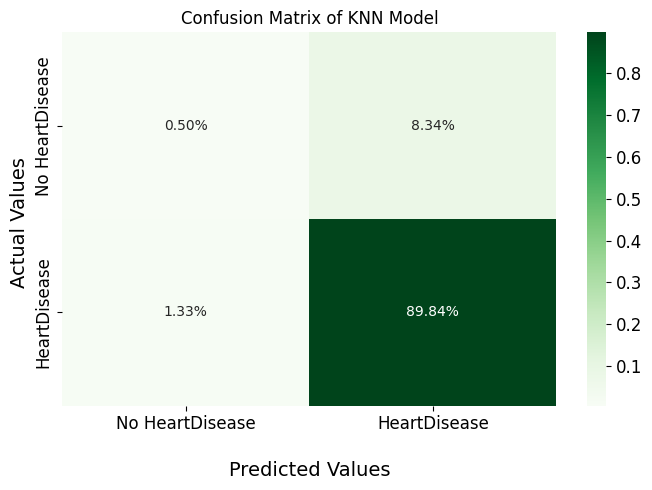

Saving figure ROC_Curve_of_KNN_Model


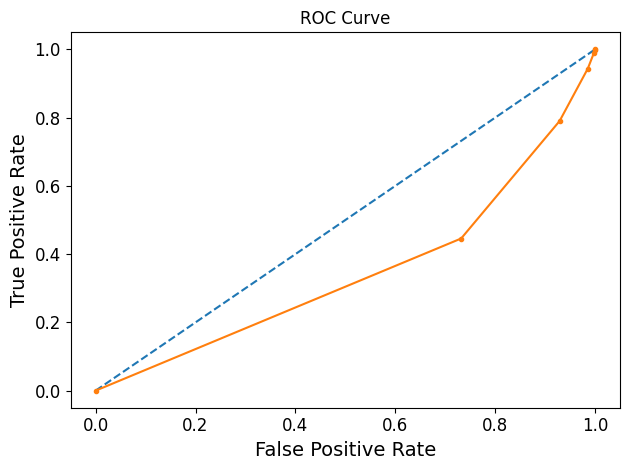

Saving figure Precision_Recall_Curve_of_KNN_Model


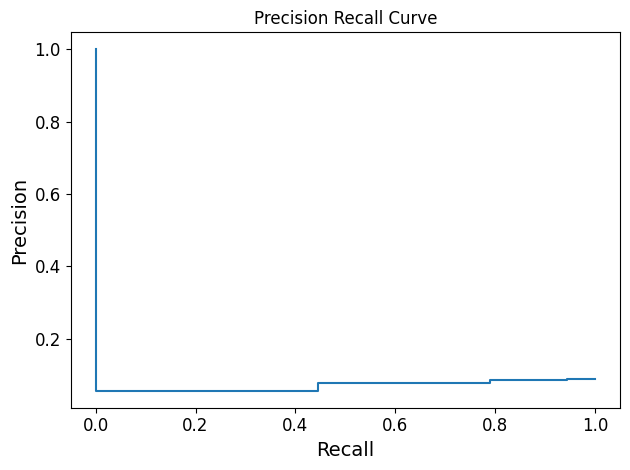

In [25]:
# Display KMeans Metrics
KMEANS_PATH = os.path.join('kmeans')
def evaluate_KMeans():
    print("KMeans Metrics:\n")
    clf = full_knn_model
    y_pred = clf.predict(x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(y_test, y_pred)

    # evaluate
    print(classification_report(y_test, y_pred))

    # print True and False Positive Rates

    # predict probabilities
    probs = clf.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error of the KNN model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,
                                    pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.set_title('Confusion Matrix of KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(KMEANS_PATH,f"Confusion_Matrix_of_KNN_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(KMEANS_PATH,f"ROC_Curve_of_KNN_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(KMEANS_PATH,f"Precision_Recall_Curve_of_KNN_Model")
    plt.show()
    return fpr, tpr

fpr3, tpr3 = evaluate_KMeans()

### Top Feature Selector

### Display KMeans Metrics Using Reduced Feature
This model does not work with our dataset

In [27]:
# Display Reduced KMeans Metrics

heartdisease_red_test = pd.concat([red_x_test, red_x_test], axis=1)

KMEANS_PATH = os.path.join('kmeans')
def evaluate_ReducedKMeans():
    print( "Reduced KMeans Metrics:\n")
    reduced_kmeans = reduced_kmeans_model
    y_pred = reduced_kmeans.predict(heartdisease_red_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate
    print(classification_report(red_y_test, y_pred))

    # predict probabilities
    probs = reduced_kmeans.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the KNN model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs, pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(KMEANS_PATH,f"Confusion_Matrix_of_Reduced_KNN_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(KMEANS_PATH, f"ROC_Curve_of_Reduced_KNN_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(KMEANS_PATH, f"Precision_Recall_Curve_of_Reduced_KNN_Model")
    plt.show()
    return fpr, tpr

fpr4, tpr4 = evaluate_ReducedKMeans()


Reduced KMeans Metrics:



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- asthma
- genHealth
- heartDisease
- kidneyDisease
- skinCancer
- ...


### Display Random Forest Metrics Using Reduced Feature

Reduced Random Forest Metrics:

Number of Positive Predictions (Heart Disease): 2988
Number of Negative Predictions (No Heart Disease): 67452
              precision    recall  f1-score   support

           1       0.29      0.14      0.18      6271
           2       0.92      0.97      0.94     64169

    accuracy                           0.89     70440
   macro avg       0.60      0.55      0.56     70440
weighted avg       0.86      0.89      0.88     70440

AUC: 0.749
Mean Absolute Error of the KNN model is 0.10725440090857467
False Positive Rate [0.         0.46751547 0.46753105 ... 0.99992208 0.99996883 1.        ] True Postitive Rate [0.         0.12980386 0.12980386 ... 0.99984054 1.         1.        ]
Saving figure Confusion_Matrix_of_Reduced_Random_Forest_Model


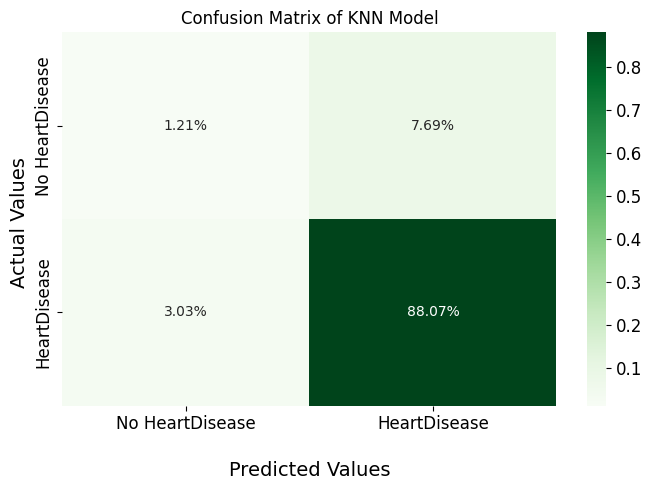

Saving figure ROC_Curve_of_Reduced_Random_Forest_Model


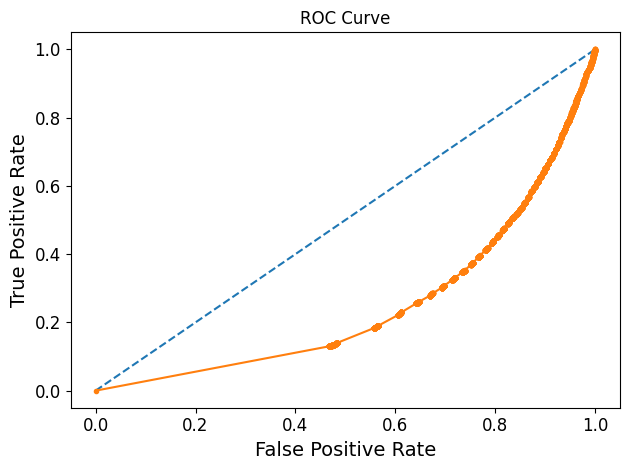

Saving figure Precision_Recall_Curve_of_Reduced_Random_Forest_Model


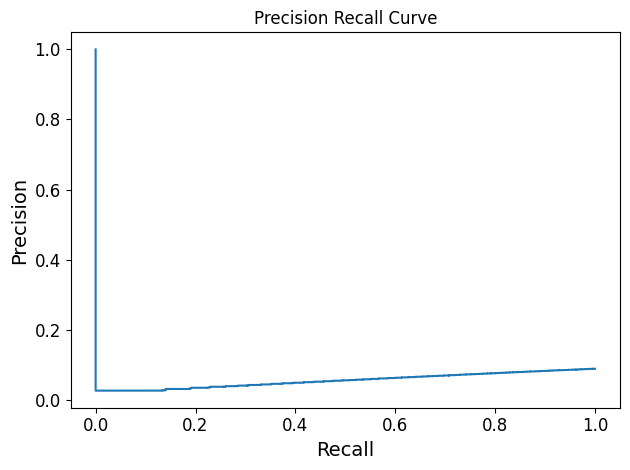

In [ ]:
# Display Reduced Random Forest Metrics
RANDOMFOREST_PATH = os.path.join('randomforest')
def evaluate_ReducedRandomForest():
    print("Reduced Random Forest Metrics:\n")
    reduced_rf = reduced_randomforest_model
    y_pred = reduced_rf.predict(red_x_test)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")
    cm = confusion_matrix(red_y_test, y_pred)

    # evaluate
    print(classification_report(red_y_test, y_pred))
    
    # predict probabilities
    probs = reduced_rf.predict_proba(red_x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(red_y_test, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(red_y_test, y_pred)
    print("Mean Absolute Error of the KNN model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(red_y_test, probs,pos_label=1)
    
    #print a couple of the True and False Positive Rates results
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.set_title('Confusion Matrix of KNN Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(RANDOMFOREST_PATH,f"Confusion_Matrix_of_Reduced_Random_Forest_Model")
    plt.show()

    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(RANDOMFOREST_PATH,f"ROC_Curve_of_Reduced_Random_Forest_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(red_y_test, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(RANDOMFOREST_PATH,f"Precision_Recall_Curve_of_Reduced_Random_Forest_Model")
    plt.show()
    return fpr, tpr

fpr5, tpr5 = evaluate_ReducedRandomForest()

Saving figure ROC_Curve_of_All_Models


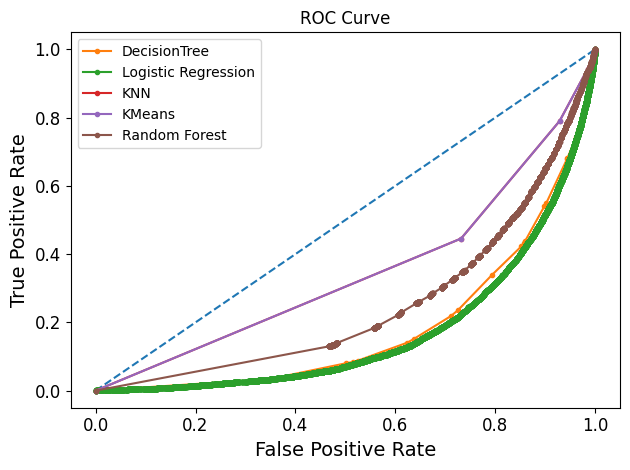

In [ ]:
# ROC Curve with all models
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='DecisionTree')
plt.plot(fpr1, tpr1, marker='.', label='Logistic Regression')
plt.plot(fpr2, tpr2, marker='.', label='KNN')
plt.plot(fpr3, tpr3, marker='.', label='KMeans')
#plt.plot(fpr4, tpr4, marker='.', label='Reduced KMeans')
plt.plot(fpr5, tpr5, marker='.', label='Random Forest')

# labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
# show the plot
save_fig(
    'allmodels',
    "ROC_Curve_of_All_Models")
plt.show()
